In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# argmin
A =np.zeros((10,10))

# Définition des champs de vecteurs et déformations
# Paramètres

d = 2 # Dim de l'espace dans lequel vivent les courbes
n = 100
r = n

noyau_gauss = lambda sigma,x,y : np.exp(-np.linalg.norm(x-y)**2/(2*sigma**2))

def champ_vect(Z,sigma,fam_gen,x): #x est un vecteur de R^d, ou un tableau contenant uniquement de tels vecteurs
    res = np.zeros(d)
    for i in range(r):
        res += noyau_gauss(sigma,Z[i],x)*fam_gen[i]
    return res

def deform(Z,sigma,fam_gen,x):
    return x + champ_vect(Z,sigma,fam_gen,x)

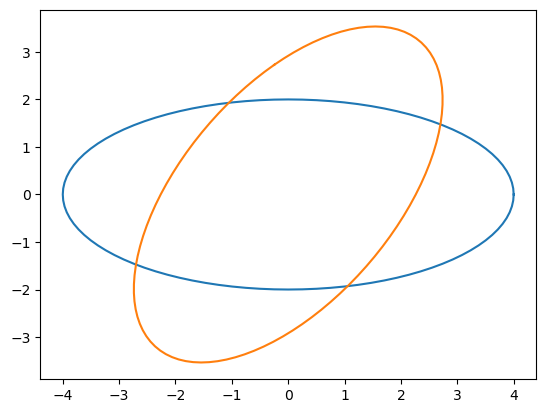

In [20]:
def ellipse(a,b,rot):
    theta = np.linspace(rot,2*np.pi+rot,n+1)
    x = a*np.cos(theta)*np.cos(rot) - b*np.sin(theta)*np.sin(rot)
    y = a*np.cos(theta)*np.sin(rot) + b*np.sin(theta)*np.cos(rot)
    return x,y

x1,x2 = ellipse(4,2,0) 
y1,y2 = ellipse(4,2,1)

plt.figure()
plt.plot(x1,x2)
plt.plot(y1,y2)
plt.show()

In [21]:
sigma = 1
lambd = 1
X_origin = np.array([[x1[i],x2[i]] for i in range(n)])
Y_origin = np.array([[y1[i],y2[i]] for i in range(n)])
Z_vect = X_origin


K_matrix = lambda  sigma : np.array([[noyau_gauss(sigma,Z_vect[i],X_origin[j]) for j in range(n)] for i in range(n)])
M_matrix = lambda sigma,lambd : np.eye(n) + 2*lambd*(K_matrix(sigma)@K_matrix(sigma))
A_matrix = lambda sigma,lambd : np.linalg.inv(M_matrix(sigma,lambd))@(2*lambd*(K_matrix(sigma)@(Y_origin-X_origin)))

In [22]:
phi = lambda sigma,lambd,x: deform(Z_vect,sigma,A_matrix(sigma,lambd),x)

X_deform = lambda sigma,lambd : [phi(sigma,lambd,X_origin[i]) for i in range(n)]
X_deform_courbe = lambda sigma,lambd : np.vstack([X_deform(sigma,lambd),X_deform(sigma,lambd)[0]])

In [ ]:
x1_deform, x2_deform = X_deform_courbe(sigma,lambd)[:,0],X_deform_courbe(sigma,lambd)[:,1]

plt.figure()
plt.plot(x1_deform,x2_deform)
plt.plot(y1,y2)
plt.show()

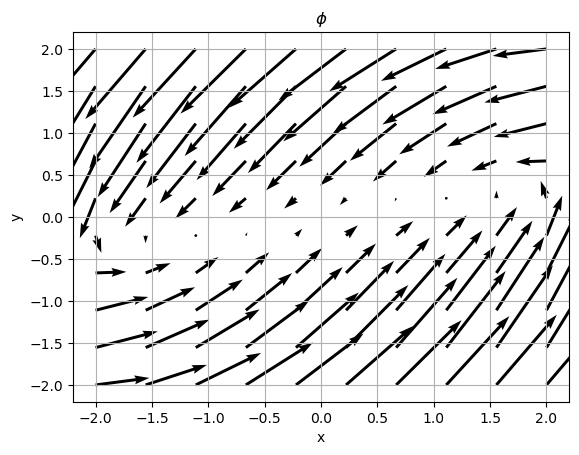

In [134]:
phi = lambda x,y : deform(Z,sigma,A,np.array([x,y]))

N = 10
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X,Y = np.meshgrid(x, y)

U = np.zeros_like(X)
V = np.zeros_like(Y)
for i in range(len(x)):
    for j in range(len(y)):
        U[j,i],V[j,i] = phi(X[j,i],Y[j,i])

plt.figure()
plt.quiver(X, Y, U, V, scale=20)  # scale ajuste la longueur des vecteurs
plt.xlabel('x')
plt.ylabel('y')
plt.title('$\phi$')
plt.grid()
plt.show()

In [ ]:
sigma = 1
lambd = 1
X = np.array([[x1[i],x2[i]] for i in range(n)])
Y = np.array([[y1[i],y2[i]] for i in range(n)])
Z = X

K = np.array([[noyau_gauss(sigma,Z[i],X[j]) for j in range(n)] for i in range(n)])
M = np.eye(n) + 2*lambd*(K@K)
A = np.linalg.inv(M)@(2*lambd*(K@(Y-X)))

phi = lambda x: deform(Z,sigma,A,x)

X_deform = [phi(X[i]) for i in range(n)]
X_deform2 = np.vstack([X_deform,X_deform[0]])
x1_deform, x2_deform = X_deform2[:,0],X_deform2[:,1]

plt.figure()
plt.plot(x1_deform,x2_deform)
plt.plot(y1,y2)
plt.show()